In [1]:
from pathlib import Path
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.PDB import MMCIFParser, PDBParser
from matplotlib.colors import LinearSegmentedColormap
import networkx as nx
from tqdm.notebook import tqdm
from scipy.stats import ttest_rel

In [2]:
MOR1abtub30degRMSF = np.loadtxt('/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 MD simulations for manuscript/MOR1 manuscript MD data files/MOR1abtub30deg RMSF', delimiter=None)
mor11abtub30degRMSF = np.loadtxt('/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 MD simulations for manuscript/MOR1 manuscript MD data files/mor11abtub30deg RMSF', delimiter=None)
desktop_path1 = ('/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 MD simulations for manuscript/MOR1 MD figures for manuscript/MOR1andmor11abtub30ALPHARMSF.png')
desktop_path2 = ('/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 MD simulations for manuscript/MOR1 MD figures for manuscript/MOR1andmor11abtub30BETARMSF.png')
desktop_path3 = ('/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 MD simulations for manuscript/MOR1 MD figures for manuscript/MOR1andmor11abtub30RMSF.png')

# Extract columns
x1rmsf = mor11abtub30degRMSF[:, 0]  # Residue indices for mor1-1
y1rmsf = mor11abtub30degRMSF[:, 1]  # RMSF values for mor1-1

x2rmsf = MOR1abtub30degRMSF[:, 0]  # Residue indices for MOR1
y2rmsf = MOR1abtub30degRMSF[:, 1]  # RMSF values for MOR1

# Define residue ranges for the three proteins
protein1_range = 450
protein2_range = 444
protein3_range = 240

# Split the data into proteins for mor1-1
#alpha
protein1_x1 = x1rmsf[:protein1_range]
protein1_y1 = y1rmsf[:protein1_range]
#beta
protein2_x1 = x1rmsf[protein1_range:protein1_range + protein2_range]
protein2_y1 = y1rmsf[protein1_range:protein1_range + protein2_range]
#mor1-1
protein3_x1 = x1rmsf[protein1_range + protein2_range:]
protein3_y1 = y1rmsf[protein1_range + protein2_range:]

# Split the data into proteins for MOR1
#alpha
protein1_x2 = x2rmsf[:protein1_range]
protein1_y2 = y2rmsf[:protein1_range]
#beta
protein2_x2 = x2rmsf[protein1_range:protein1_range + protein2_range]
protein2_y2 = y2rmsf[protein1_range:protein1_range + protein2_range]
#MOR1
protein3_x2 = x2rmsf[protein1_range + protein2_range:]
protein3_y2 = y2rmsf[protein1_range + protein2_range:]

ll = 0
rl = 450
rlm =240


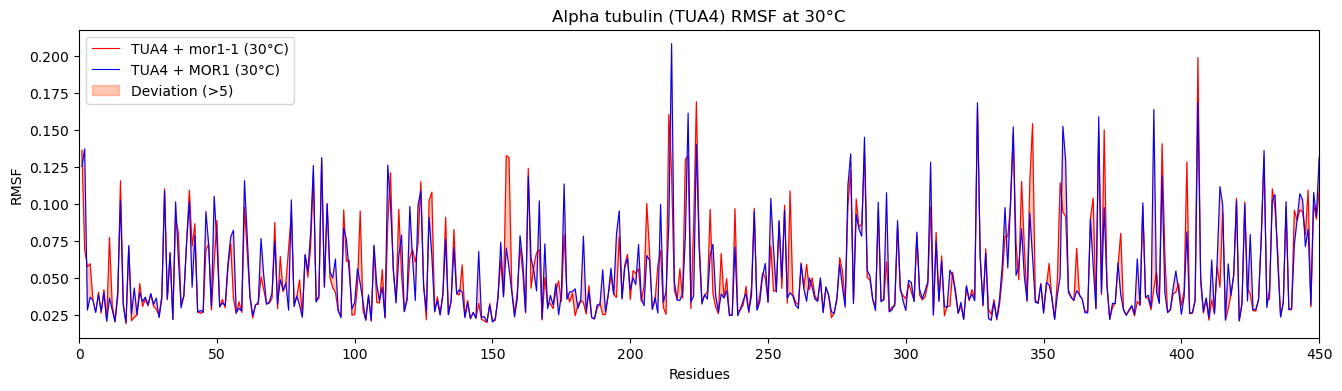


Alpha tubulin (TUA4) RMSF at 30°C

Mean 1: 0.05264599999999999
Mean 2: 0.05282

T-statistic: 0.20022691765999356
P-value: 0.8413937722695979

The RMSF values are not significantly different (p >= 0.05)


In [3]:
# Plot Protein 1 (Chain A and Chain B)
plt.figure(figsize=(16, 4))
plt.xlim(ll, rl)
plt.plot(protein1_x1, protein1_y1, label='TUA4 + mor1-1 (30°C)', color='red', linewidth=0.8)
plt.plot(protein1_x2, protein1_y2, label='TUA4 + MOR1 (30°C)', color='blue', linewidth=0.8)
deviation = np.abs(protein1_y1 - protein1_y2)
plt.fill_between(
    protein1_x1,  # x-axis values
    protein1_y1,  # lower boundary (line 1)
    protein1_y2,  # upper boundary (line 2)
    where=(deviation > 0.00004),  # condition for highlighting
    color="orangered",
    alpha=0.3,
    label="Deviation (>5)"
)

plt.xlabel("Residues")
plt.ylabel("RMSF")
figtitle = "Alpha tubulin (TUA4) RMSF at 30°C"
plt.title(figtitle)
plt.legend()
plt.savefig(desktop_path1, format='png', dpi=300) 
plt.show()


mean_rmsf_atubmut = np.mean(protein1_y1)
mean_rmsf_atubwt = np.mean(protein1_y2)

print("")
print(figtitle)
print("")
print(f"Mean 1: {mean_rmsf_atubwt}")
print(f"Mean 2: {mean_rmsf_atubmut}")
print("")

t_stat, p_value = ttest_rel(protein1_y1, protein1_y2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print("")

if p_value < 0.05:
    print("The RMSF values are significantly different (p < 0.05)")
else:
    print("The RMSF values are not significantly different (p >= 0.05)")


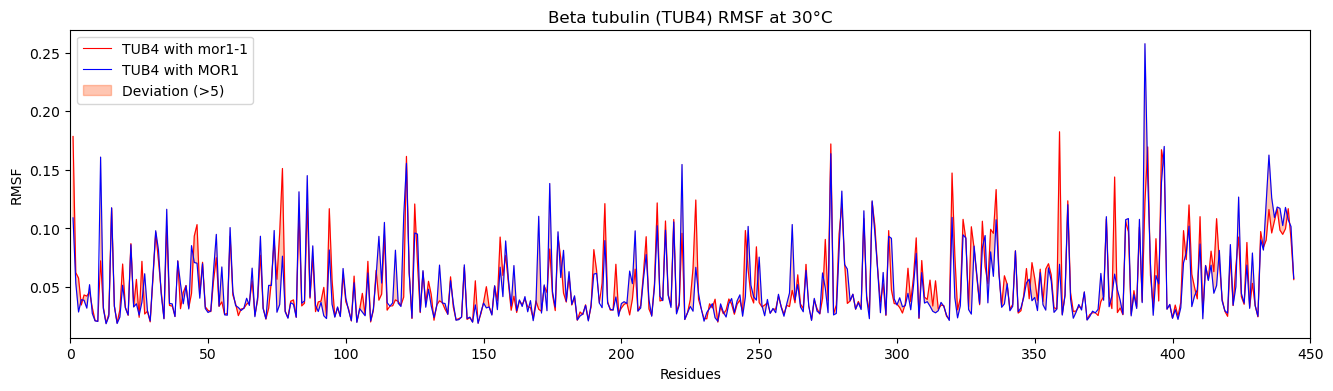

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

In [4]:
# Plot Protein 2 (Chain A and Chain B)
plt.figure(figsize=(16, 4))
plt.xlim(ll, rl)
plt.plot(protein2_x1, protein2_y1, label='TUB4 with mor1-1', color='red', linewidth=0.8)
plt.plot(protein2_x2, protein2_y2, label='TUB4 with MOR1', color='blue', linewidth=0.8)
deviation = np.abs(protein2_y1 - protein2_y2)
plt.fill_between(
    protein2_x1,  # x-axis values
    protein2_y1,  # lower boundary (line 1)
    protein2_y2,  # upper boundary (line 2)
    where=(deviation > 0.00004),  # condition for highlighting
    color="orangered",
    alpha=0.3,
    label="Deviation (>5)"
)

plt.xlabel("Residues")
plt.ylabel("RMSF")
figtitle = "Beta tubulin (TUB4) RMSF at 30°C"
plt.title(figtitle)
plt.legend()
plt.savefig(desktop_path2, format='png', dpi=300) 
plt.show()



mean_rmsf_btubmut = np.mean(protein2_y1)
mean_rmsf_btubwt = np.mean(protein2_y2)
print(protein2_x1, protein2_y1)
print("")
print(figtitle)
print("")
print(f"Beta tubulin + MOR1 mean: {mean_rmsf_btubwt}")
print(f"Beta tubulin + mor1-1: {mean_rmsf_btubmut}")
print("")

t_stat, p_value = ttest_rel(protein2_y1, protein2_y2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print("")

if p_value < 0.05:
    print("The RMSF values are significantly different (p < 0.05)")
else:
    print("The RMSF values are not significantly different (p >= 0.05)")


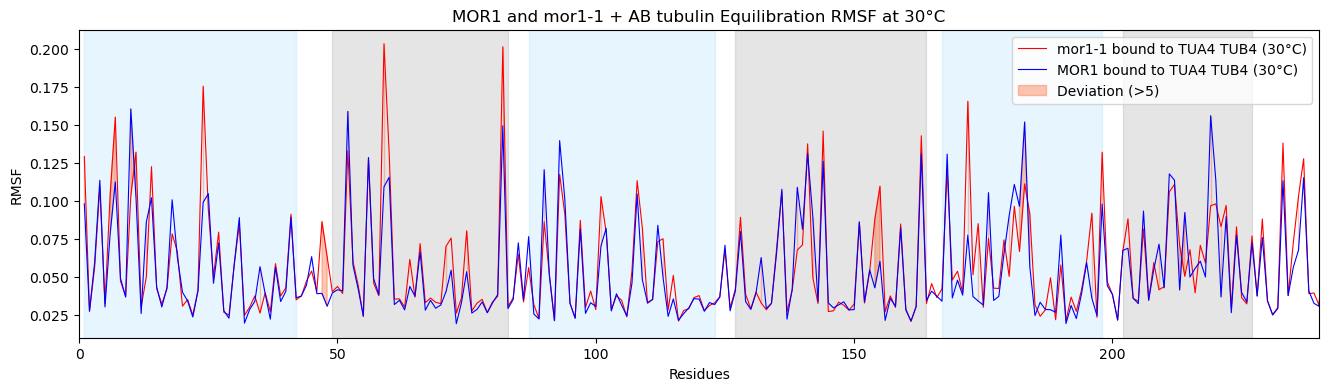


MOR1 and mor1-1 + AB tubulin Equilibration RMSF at 30°C

Mean 1: 0.054894262295081965
Mean 2: 0.05823155737704919

T-statistic: 2.7843989508757834
P-value: 0.005784870299062055

The RMSF values are significantly different (p < 0.05)


In [5]:
# Plot Protein 3 (mor1)
plt.figure(figsize=(16, 4))
plt.xlim(ll, rlm)
plt.plot(protein3_x1, protein3_y1, label='mor1-1 bound to TUA4 TUB4 (30°C)', color='red', linewidth=0.8)
plt.plot(protein3_x2, protein3_y2, label='MOR1 bound to TUA4 TUB4 (30°C)', color='blue', linewidth=0.8)
deviation = np.abs(protein3_y1 - protein3_y2)
plt.fill_between(
    protein3_x1,  # x-axis values
    protein3_y1,  # lower boundary (line 1)
    protein3_y2,  # upper boundary (line 2)
    where=(deviation > 0.025),  # condition for highlighting
    color="orangered",
    alpha=0.3,
    label="Deviation (>5)"
)
# HEAT repeats
plt.axvspan(1, 42, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(49, 83, zorder=0, alpha=0.2, color='grey')
plt.axvspan(87, 123, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(127, 164, zorder=0, alpha=0.2, color='grey')
plt.axvspan(167, 198, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(202, 227, zorder=0, alpha=0.2, color='grey')

plt.xlabel("Residues")
plt.ylabel("RMSF")
figtitle = "MOR1 and mor1-1 + AB tubulin Equilibration RMSF at 30°C"
plt.title(figtitle)
plt.legend()
plt.savefig(desktop_path3, format='png', dpi=300) 
plt.show()


mean_rmsf_mor1_1 = np.mean(protein3_y1)
mean_rmsf_mor1 = np.mean(protein3_y2)


print("")
print(figtitle)
print("")
print(f"Mean 1: {mean_rmsf_mor1}")
print(f"Mean 2: {mean_rmsf_mor1_1}")
print("")

t_stat, p_value = ttest_rel(protein3_y1, protein3_y2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print("")

if p_value < 0.05:
    print("The RMSF values are significantly different (p < 0.05)")
else:
    print("The RMSF values are not significantly different (p >= 0.05)")


In [6]:
#

In [7]:
#

In [8]:
# FOR THE MOR1 21 degree data!!

MOR1abtub21degRMSF = np.loadtxt('/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 MD simulations for manuscript/MOR1 manuscript MD data files/MOR1abtub21deg RMSF', delimiter=None)
mor11abtub21degRMSF = np.loadtxt('/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 MD simulations for manuscript/MOR1 manuscript MD data files/mor1-1abtub21deg RMSF', delimiter=None)
desktop_path11 = ('/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 MD simulations for manuscript/MOR1 MD figures for manuscript/MOR1andmor11abtubALPHARMSF21deg.png')
desktop_path12 = ('/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 MD simulations for manuscript/MOR1 MD figures for manuscript/MOR1andmor11abtubBETARMSF21deg.png')
desktop_path13 = ('/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 MD simulations for manuscript/MOR1 MD figures for manuscript/MOR1andmor11abtubRMSF21deg.png')

# Extract columns
x1rmsf21 = mor11abtub21degRMSF[:, 0]  # Residue indices for mor1-1
y1rmsf21 = mor11abtub21degRMSF[:, 1]  # RMSF values for mor1-1

x2rmsf21 = MOR1abtub21degRMSF[:, 0]  # Residue indices for MOR1
y2rmsf21 = MOR1abtub21degRMSF[:, 1]  # RMSF values for MOR1

# Define residue ranges for the three proteins
protein1_range = 450
protein2_range = 444
protein3_range = 240

# Split the data into proteins for mor1-1
#alpha
protein1_x1 = x1rmsf21[:protein1_range]
protein1_y1 = y1rmsf21[:protein1_range]
#beta
protein2_x1 = x1rmsf21[protein1_range:protein1_range + protein2_range]
protein2_y1 = y1rmsf21[protein1_range:protein1_range + protein2_range]
#mor1-1
protein3_x1 = x1rmsf21[protein1_range + protein2_range:]
protein3_y1 = y1rmsf21[protein1_range + protein2_range:]

# Split the data into proteins for MOR1
#alpha
protein1_x2 = x2rmsf21[:protein1_range]
protein1_y2 = y2rmsf21[:protein1_range]
#beta
protein2_x2 = x2rmsf21[protein1_range:protein1_range + protein2_range]
protein2_y2 = y2rmsf21[protein1_range:protein1_range + protein2_range]
#MOR1
protein3_x2 = x2rmsf21[protein1_range + protein2_range:]
protein3_y2 = y2rmsf21[protein1_range + protein2_range:]

ll = 0
rl = 450
rlm =240


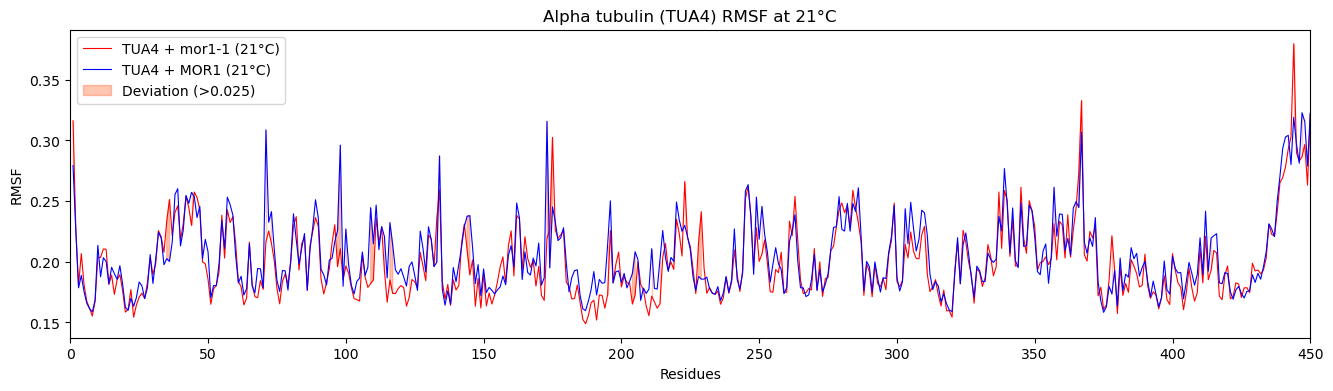


Alpha tubulin (TUA4) RMSF at 21°C

Mean 1: 0.20465763985893562
Mean 2: 0.20003011803916176

T-statistic: -6.280965079850617
P-value: 7.956064450093733e-10

The RMSF values are significantly different (p < 0.05)
### Statistical Tests ###
Paired t-test: T-statistic = -6.2810, P-value = 7.9561e-10
Shapiro-Wilk test (normality of differences): P-value = 4.7222e-18
Wilcoxon signed-rank test: Statistic = 29483.0000, P-value = 1.3590e-14

The RMSF values are significantly different (Paired t-test, p < 0.05)
The RMSF values are significantly different (Wilcoxon test, p < 0.05)
Effect size (Cohen's d): -0.2961


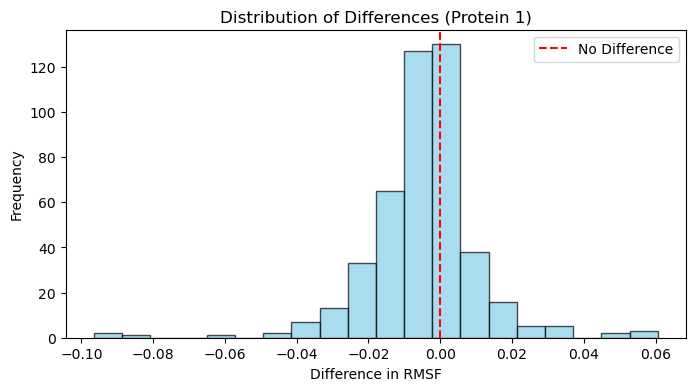

In [9]:
# Plot Protein 1 (Chain A and Chain B)
plt.figure(figsize=(16, 4))
plt.xlim(ll, rl)
plt.plot(protein1_x1, protein1_y1, label='TUA4 + mor1-1 (21°C)', color='red', linewidth=0.8)
plt.plot(protein1_x2, protein1_y2, label='TUA4 + MOR1 (21°C)', color='blue', linewidth=0.8)
deviation = np.abs(protein1_y1 - protein1_y2)
plt.fill_between(
    protein1_x1,  # x-axis values
    protein1_y1,  # lower boundary (line 1)
    protein1_y2,  # upper boundary (line 2)
    where=(deviation > 0.025),  # condition for highlighting
    color="orangered",
    alpha=0.3,
    label="Deviation (>0.025)"
)

plt.xlabel("Residues")
plt.ylabel("RMSF")
figtitle = "Alpha tubulin (TUA4) RMSF at 21°C"
plt.title(figtitle)
plt.legend()
plt.savefig(desktop_path11, format='png', dpi=300) 
plt.show()

from scipy.stats import ttest_rel, wilcoxon, shapiro
from scipy.stats import mannwhitneyu 

mean_rmsf_atubmut21 = np.mean(protein1_y1)
mean_rmsf_atubwt21 = np.mean(protein1_y2)
# Check normality of the differences (Shapiro-Wilk test)
differences = protein1_y1 - protein1_y2
shapiro_stat, shapiro_p = shapiro(differences)

print("")
print(figtitle)
print("")
print(f"Mean 1: {mean_rmsf_atubwt21}")
print(f"Mean 2: {mean_rmsf_atubmut21}")
print("")

t_stat, p_value = ttest_rel(protein1_y1, protein1_y2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print("")

if p_value < 0.05:
    print("The RMSF values are significantly different (p < 0.05)")
else:
    print("The RMSF values are not significantly different (p >= 0.05)")


# Non-parametric Wilcoxon signed-rank test
wilcoxon_stat, wilcoxon_p = wilcoxon(protein1_y1, protein1_y2)

# Print results
print("### Statistical Tests ###")
print(f"Paired t-test: T-statistic = {t_stat:.4f}, P-value = {p_value:.4e}")
print(f"Shapiro-Wilk test (normality of differences): P-value = {shapiro_p:.4e}")
print(f"Wilcoxon signed-rank test: Statistic = {wilcoxon_stat:.4f}, P-value = {wilcoxon_p:.4e}")
print()

if p_value < 0.05:
    print("The RMSF values are significantly different (Paired t-test, p < 0.05)")
if wilcoxon_p < 0.05:
    print("The RMSF values are significantly different (Wilcoxon test, p < 0.05)")

# Calculate and print effect size (Cohen's d for paired data)
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)
cohens_d = mean_diff / std_diff
print(f"Effect size (Cohen's d): {cohens_d:.4f}")

# Optional: Visualization of differences
plt.figure(figsize=(8, 4))
plt.hist(differences, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5, label='No Difference')
plt.xlabel('Difference in RMSF')
plt.ylabel('Frequency')
plt.title('Distribution of Differences (Protein 1)')
plt.legend()
plt.show()

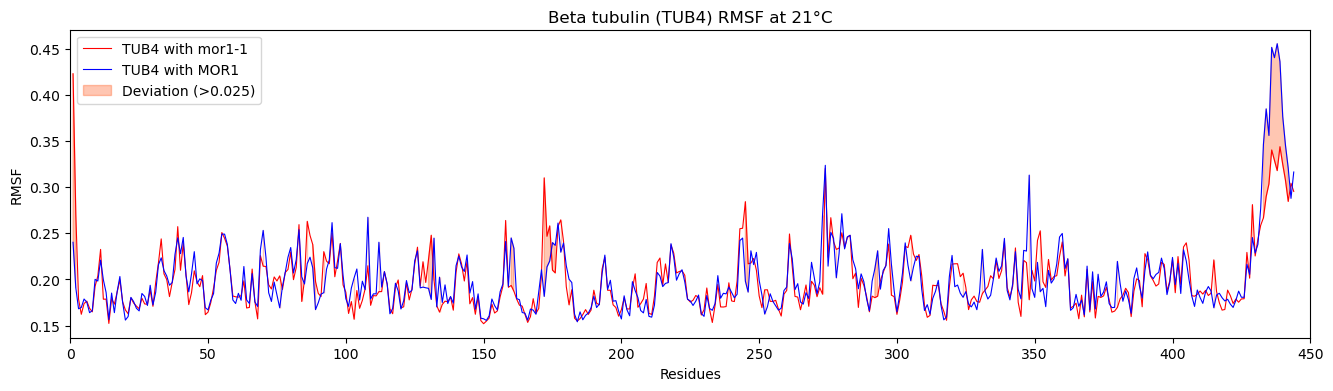


Beta tubulin (TUB4) RMSF at 21°C

Beta tubulin + MOR1 mean: 0.200867499590714
Beta tubulin + mor1-1: 0.1987501884403203

T-statistic: -1.838961320806257
P-value: 0.06658999382948133

The RMSF values are not significantly different (p >= 0.05)


In [10]:
# TUB4 with MOR1 and mor1-1 at 21 degrees
plt.figure(figsize=(16, 4))
plt.xlim(ll, rl)
plt.plot(protein2_x1 - rl, protein2_y1, label='TUB4 with mor1-1', color='red', linewidth=0.8)
plt.plot(protein2_x2 - rl, protein2_y2, label='TUB4 with MOR1', color='blue', linewidth=0.8)
deviation = np.abs(protein2_y1 - protein2_y2)
plt.fill_between(
    protein2_x1 - rl,  # x-axis values
    protein2_y1,  # lower boundary (line 1)
    protein2_y2,  # upper boundary (line 2)
    where=(deviation > 0.025),  # condition for highlighting
    color="orangered",
    alpha=0.3,
    label="Deviation (>0.025)"
)

plt.xlabel("Residues")
plt.ylabel("RMSF")
figtitle = "Beta tubulin (TUB4) RMSF at 21°C"
plt.title(figtitle)
plt.legend()
plt.savefig(desktop_path12, format='png', dpi=300) 
plt.show()



mean_rmsf_btubmut21 = np.mean(protein2_y1)
mean_rmsf_btubwt21 = np.mean(protein2_y2)

print("")
print(figtitle)
print("")
print(f"Beta tubulin + MOR1 mean: {mean_rmsf_btubwt21}")
print(f"Beta tubulin + mor1-1: {mean_rmsf_btubmut21}")
print("")

t_stat, p_value = ttest_rel(protein2_y1, protein2_y2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print("")

if p_value < 0.05:
    print("The RMSF values are significantly different (p < 0.05)")
else:
    print("The RMSF values are not significantly different (p >= 0.05)")



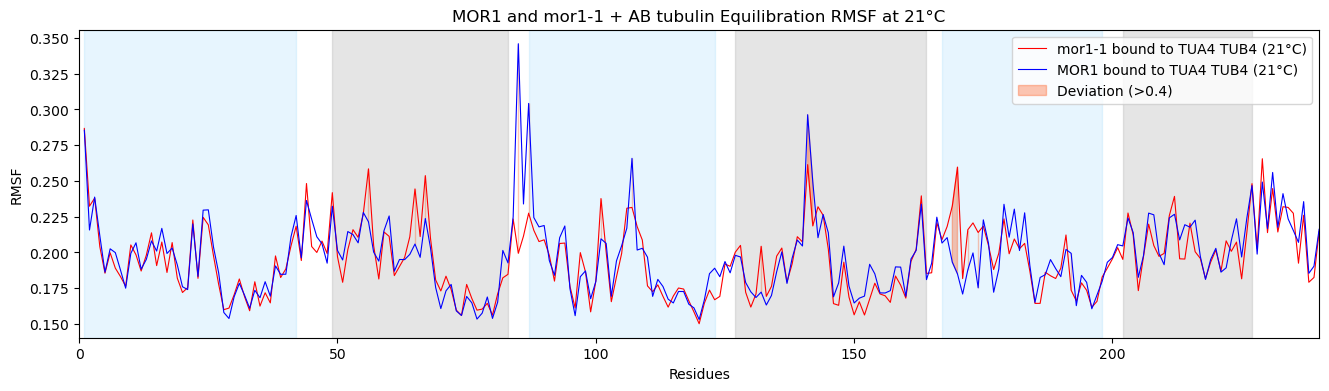


MOR1 and mor1-1 + AB tubulin Equilibration RMSF at 21°C

Mean 1: 0.19796860114460432
Mean 2: 0.19600962756097787

T-statistic: -1.8866950139802594
P-value: 0.06039357651002726

The RMSF values are not significantly different (p >= 0.05)


In [11]:
# MOR1 and mor1-1 at 21 degrees
plt.figure(figsize=(16, 4))
plt.xlim(ll, rlm)
plt.plot(protein3_x1 - 450 - 444, protein3_y1, label='mor1-1 bound to TUA4 TUB4 (21°C)', color='red', linewidth=0.8)
plt.plot(protein3_x2 - 450 - 444, protein3_y2, label='MOR1 bound to TUA4 TUB4 (21°C)', color='blue', linewidth=0.8)

deviation = np.abs(protein3_y1 - protein3_y2)
dev = 0.4
plt.fill_between(
    protein3_x1-450-444,  # x-axis values
    protein3_y1,  # lower boundary (line 1)
    protein3_y2,  # upper boundary (line 2)
    where=(deviation > 0.025),  # condition for highlighting
    color="orangered",
    alpha=0.3,
    label=f"Deviation (>{dev})"
)
# HEAT repeats
plt.axvspan(1, 42, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(49, 83, zorder=0, alpha=0.2, color='grey')
plt.axvspan(87, 123, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(127, 164, zorder=0, alpha=0.2, color='grey')
plt.axvspan(167, 198, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(202, 227, zorder=0, alpha=0.2, color='grey')

plt.xlabel("Residues")
plt.ylabel("RMSF")
figtitle = "MOR1 and mor1-1 + AB tubulin Equilibration RMSF at 21°C"
plt.title(figtitle)
plt.legend()
plt.savefig(desktop_path13, format='png', dpi=300) 
plt.show()

mean_rmsf_mor1_121 = np.mean(protein3_y1)
mean_rmsf_mor121 = np.mean(protein3_y2)

print("")
print(figtitle)
print("")
print(f"Mean 1: {mean_rmsf_mor121}")
print(f"Mean 2: {mean_rmsf_mor1_121}")
print("")

t_stat, p_value = ttest_rel(protein3_y1, protein3_y2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print("")

if p_value < 0.05:
    print("The RMSF values are significantly different (p < 0.05)")
else:
    print("The RMSF values are not significantly different (p >= 0.05)")


In [12]:
## RMSD

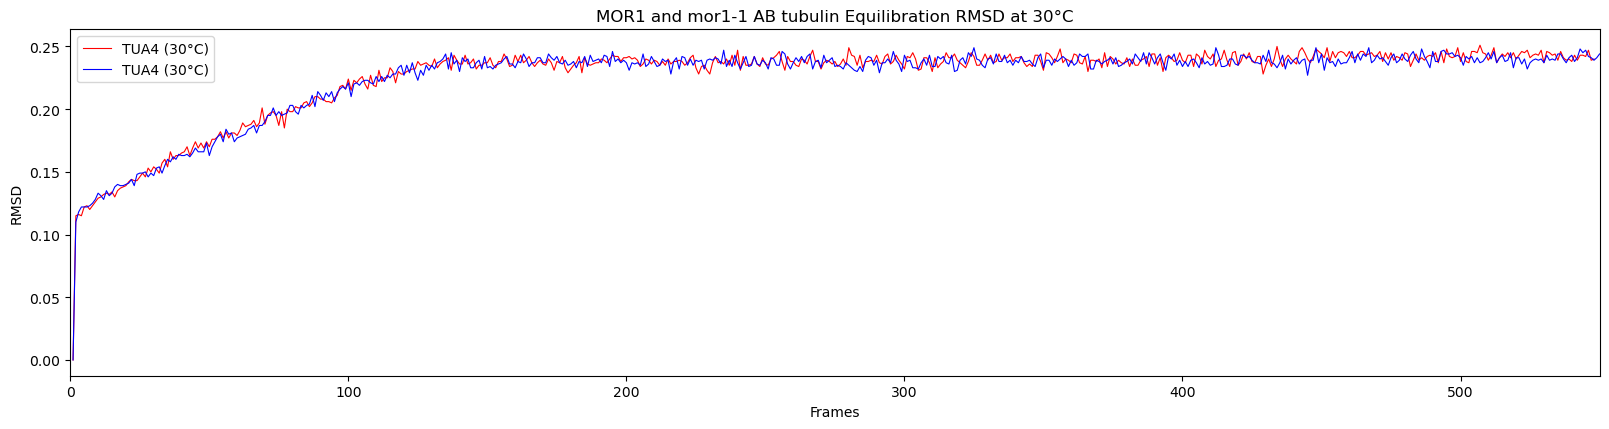

0.23962009803921566
0.23887370600414076


In [13]:
MOR1abtub30degRMSD = np.loadtxt('/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 MD simulations for manuscript/MOR1 manuscript MD data files/MOR1abtub30deg RMSD', delimiter=None)
mor11abtub30degRMSD = np.loadtxt('/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 MD simulations for manuscript/MOR1 manuscript MD data files/mor1-1abtub30deg RMSD', delimiter=None)
desktop_path7 = ('/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 MD simulations for manuscript/MOR1 MD figures for manuscript/MOR1andmor11abtub30ALPHARMSD.png')
desktop_path8 = ('/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1 MD simulations for manuscript/MOR1 MD figures for manuscript/MOR1andmor11abtub30BETARMSD.png')

x1rmsf = MOR1abtub30degRMSD[:, 0]  # Residue indices for mor1-1
y1rmsf = MOR1abtub30degRMSD[:, 1]  # RMSD values for mor1-1

x2rmsf = mor11abtub30degRMSD[:, 0]  # Residue indices for MOR1
y2rmsf = mor11abtub30degRMSD[:, 1]  # RMSD values for MOR1
plt.figure(figsize=(16, 4))
plt.plot(x1rmsf, y1rmsf, label='TUA4 (30°C)', color='red', linewidth=0.8)
plt.plot(x2rmsf, y2rmsf, label='TUA4 (30°C)', color='blue', linewidth=0.8)
plt.xlim(left=0, right=550)
plt.tight_layout()
plt.xlabel("Frames")
plt.ylabel("RMSD")
plt.title("MOR1 and mor1-1 AB tubulin Equilibration RMSD at 30°C")
plt.legend()
plt.savefig(desktop_path1, format='png', dpi=300) 
plt.show()

mean_rmsd_mor1_1 = np.mean(y1rmsf[140:])
mean_rmsd_mor1 = np.mean(y2rmsf[140:])
print(mean_rmsd_mor1_1)
print(mean_rmsd_mor1)

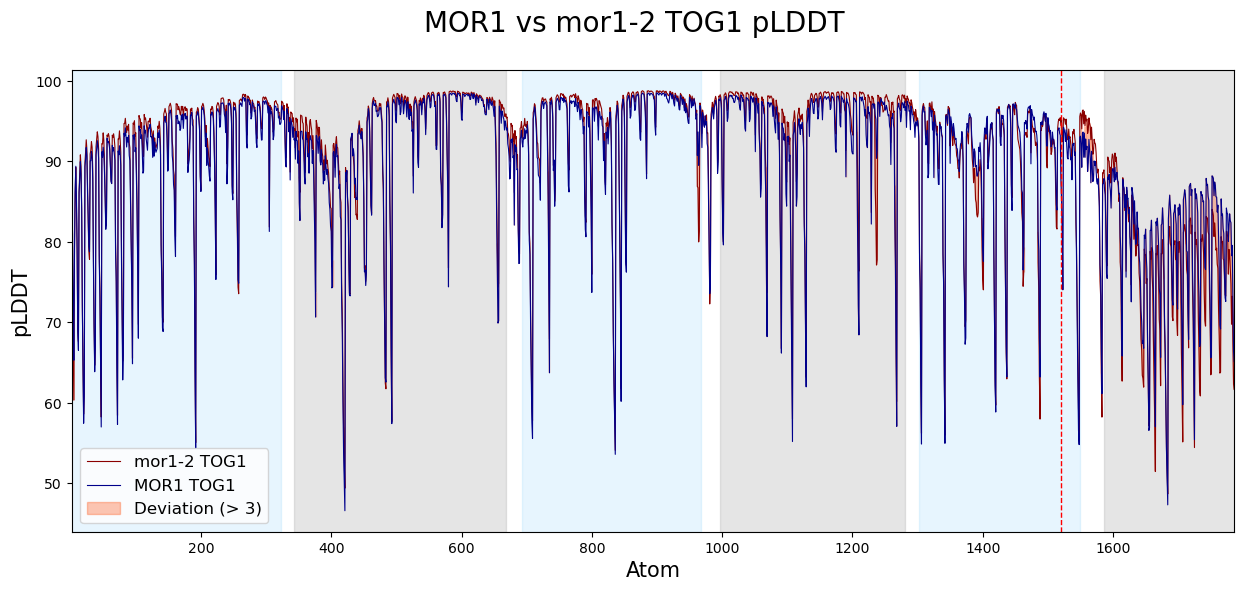

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json

# Load the data
mor12 = json.loads(Path('/Users/kamdiehl/Desktop/MOR1 Alphafold/mor1-2 mutant/fold_tog1_mor1_2_mutant_full_data_0.json').read_text())
scoresAF3l6rem = json.loads(Path("/Users/kamdiehl/Desktop/MOR1 Alphafold/MOR1 TOG1 last 6 and first 1 rem/fold_mor1_tog1_last_6_rem_and_first_1_full_data_0.json").read_text())

# Convert data to numpy arrays
data1 = np.asarray(mor12["atom_plddts"])
data2 = np.asarray(scoresAF3l6rem["atom_plddts"])

# Trim data to the same length, accounting for the shift
min_length = min(len(data1) - 8, len(data2))
data1 = data1[8:min_length]  # Shifted by 8 atoms
data2 = data2[:min_length-8]

# Calculate deviation
deviation = np.abs(data1 - data2)  # Compute absolute differences

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(data2, linewidth=0.8, color="darkred", label="mor1-2 TOG1")
plt.plot(data1, linewidth=0.8, color="darkblue", label="MOR1 TOG1")

# Highlight deviations where the absolute difference exceeds a threshold
threshold = 3
plt.fill_between(
    range(len(data1)),
    data1,
    data2,
    where=(deviation > threshold),
    color="orangered",
    alpha=0.3,
    label=f"Deviation (> {threshold})"
)



# Add labels, title, and legend
plt.xlabel("Atom", fontsize=15)
plt.ylabel("pLDDT", fontsize=15)
plt.suptitle("MOR1 vs mor1-2 TOG1 pLDDT", fontsize=20)
plt.legend(fontsize=12, loc='lower left')


left_limit, right_limit = plt.xlim()
rightEnd2 = right_limit

plt.xlim(left=2, right=rightEnd2-89)
highlight_atom = 1520
plt.axvline(x=highlight_atom, color="red", linestyle="--", linewidth=1, label="mor1-2 site")
plt.axvspan(1, 323, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(343, 669, zorder=0, alpha=0.2, color='grey')
plt.axvspan(693, 968, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(997, 1280, zorder=0, alpha=0.2, color='grey')
plt.axvspan(1302, 1549, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(1586, 1790, zorder=0, alpha=0.2, color='grey')

# Save and show the plot
output_path = "/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/mor1-2pLDDT.png"
plt.savefig(output_path, dpi=300)
plt.show()



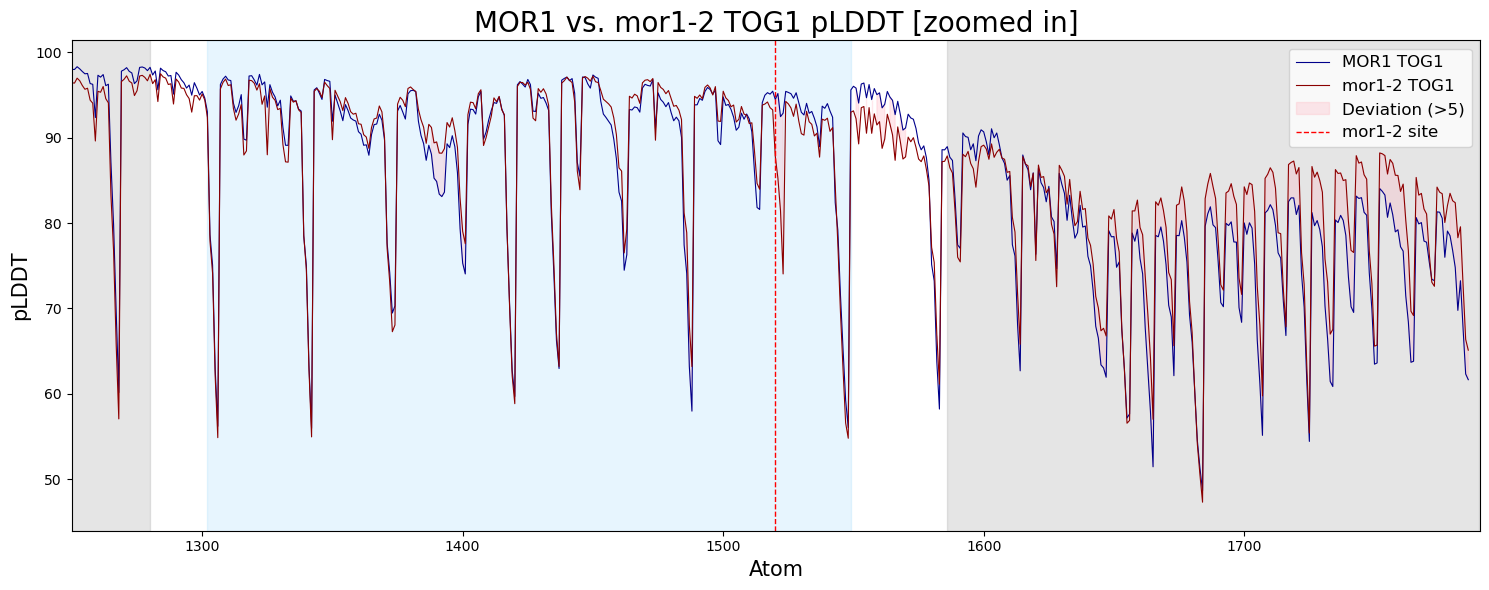

In [42]:

# Example data
data1 = np.asarray(mor12["atom_plddts"])
data2 = np.asarray(scoresAF3l6rem["atom_plddts"])

# Trim data to the same length
min_length = min(len(data1), len(data2))
data1 = data1[8:min_length]
data2 = data2[:min_length-8]

plt.figure(figsize=(15, 6))  # Width: 15 inches, Height: 6 inches
# Plot the two datasets
plt.plot(data2, linewidth=0.8, color="darkblue", label="MOR1 TOG1")
plt.plot(data1, linewidth=0.8, color="darkred", label="mor1-2 TOG1")
plt.axvspan(1, 323, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(343, 669, zorder=0, alpha=0.2, color='grey')
plt.axvspan(693, 968, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(997, 1280, zorder=0, alpha=0.2, color='grey')
plt.axvspan(1302, 1549, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(1586, 1790, zorder=0, alpha=0.2, color='grey')
# Highlight deviations
deviation = np.abs(data1 - data2) 
plt.fill_between(
    range(len(data1)),
    data1,
    data2,
    where=(deviation > 3),  
    color="lightpink",
    alpha=0.3,
    label="Deviation (>5)"
)

left_limit, right_limit = plt.xlim()
rightEnd2 = right_limit

plt.xlim(left=1250, right=rightEnd2-89)
highlight_atom = 1520  # Replace with the index of the atom you want to highlight
plt.axvline(x=highlight_atom, color="red", linestyle="--", linewidth=1, label="mor1-2 site")


# Add labels, titles, and legend
plt.xlabel("Atom", fontsize=15)
plt.ylabel("pLDDT", fontsize=15)
plt.title(f"MOR1 vs. mor1-2 TOG1 pLDDT [zoomed in]", fontsize=20)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

# Save and show the plot
plt.savefig("/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1vsmor12TeeeOG1pLDDTzoomedin.png", dpi=300)
plt.show()


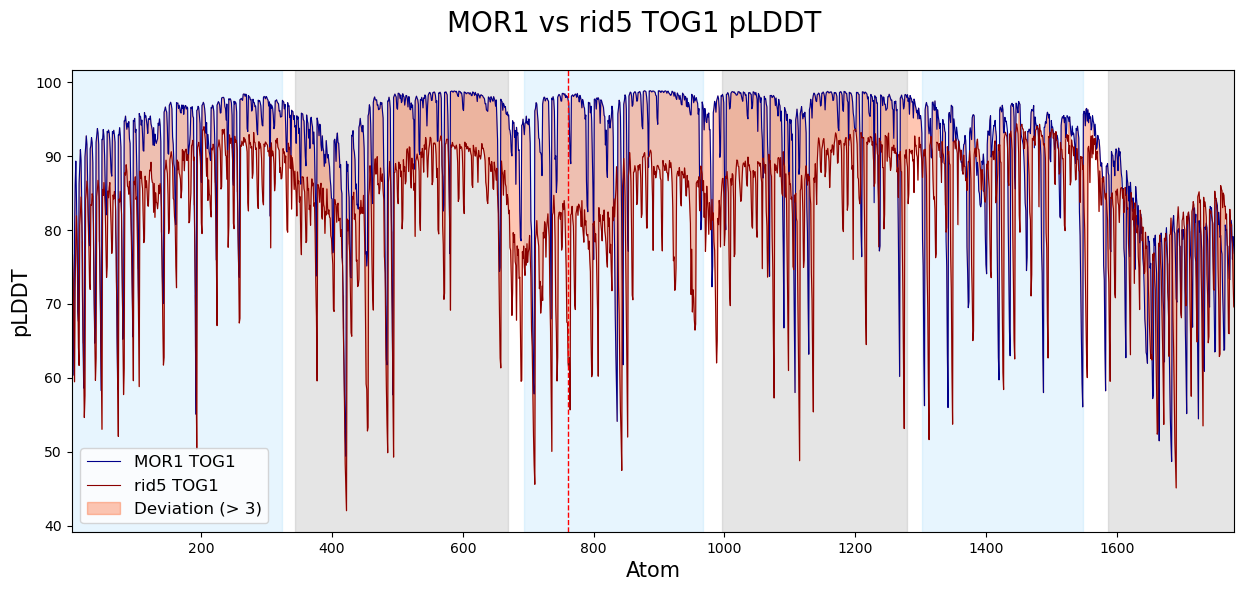


MOR1 and mor1-1 + AB tubulin Equilibration RMSF at 21°C

Mean 1: 0.19796860114460432
Mean 2: 0.19600962756097787

T-statistic: -1.8866950139802594
P-value: 0.06039357651002726

The RMSF values are not significantly different (p >= 0.05)


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json

# Load the data
rid5 = json.loads(Path('/Users/kamdiehl/Desktop/MOR1 Alphafold/rid5 mutant/fold_tog1_rid5_mutant_full_data_0.json').read_text())
scoresAF3l6rem = json.loads(Path("/Users/kamdiehl/Desktop/MOR1 Alphafold/MOR1 TOG1 last 6 and first 1 rem/fold_mor1_tog1_last_6_rem_and_first_1_full_data_0.json").read_text())

# Convert data to numpy arrays
data1 = np.asarray(rid5["atom_plddts"])
data2 = np.asarray(scoresAF3l6rem["atom_plddts"])

# Trim data to the same length, accounting for the shift
min_length = min(len(data1), len(data2)-7)
data1 = data1[7:min_length]  # Shifted by 8 atoms
data2 = data2[:min_length-7]

# Calculate deviation
deviation = np.abs(data1 - data2)  # Compute absolute differences

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(data2, linewidth=0.8, color="darkblue", label="MOR1 TOG1")
plt.plot(data1, linewidth=0.8, color="darkred", label="rid5 TOG1")


# Highlight deviations where the absolute difference exceeds a threshold
threshold = 3
plt.fill_between(
    range(len(data1)),
    data1,
    data2,
    where=(deviation > threshold),
    color="orangered",
    alpha=0.3,
    label=f"Deviation (> {threshold})"
)



# Add labels, title, and legend
plt.xlabel("Atom", fontsize=15)
plt.ylabel("pLDDT", fontsize=15)
plt.suptitle("MOR1 vs rid5 TOG1 pLDDT", fontsize=20)
plt.legend(fontsize=12, loc='lower left')


left_limit, right_limit = plt.xlim()
rightEnd2 = right_limit

plt.xlim(left=2, right=rightEnd2-89)
highlight_atom = 761
plt.axvline(x=highlight_atom, color="red", linestyle="--", linewidth=1, label="rid5 site")
plt.axvspan(1, 323, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(343, 669, zorder=0, alpha=0.2, color='grey')
plt.axvspan(693, 968, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(997, 1280, zorder=0, alpha=0.2, color='grey')
plt.axvspan(1302, 1549, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(1586, 1790, zorder=0, alpha=0.2, color='grey')

# Save and show the plot
output_path = "/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/mor1-2pLDDT.png"
plt.savefig(output_path, dpi=300)
plt.show()


mean_rmsf_mor1_121 = np.mean(protein3_y1)
mean_rmsf_mor121 = np.mean(protein3_y2)

print("")
print(figtitle)
print("")
print(f"Mean 1: {mean_rmsf_mor121}")
print(f"Mean 2: {mean_rmsf_mor1_121}")
print("")

t_stat, p_value = ttest_rel(protein3_y1, protein3_y2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print("")

if p_value < 0.05:
    print("The RMSF values are significantly different (p < 0.05)")
else:
    print("The RMSF values are not significantly different (p >= 0.05)")



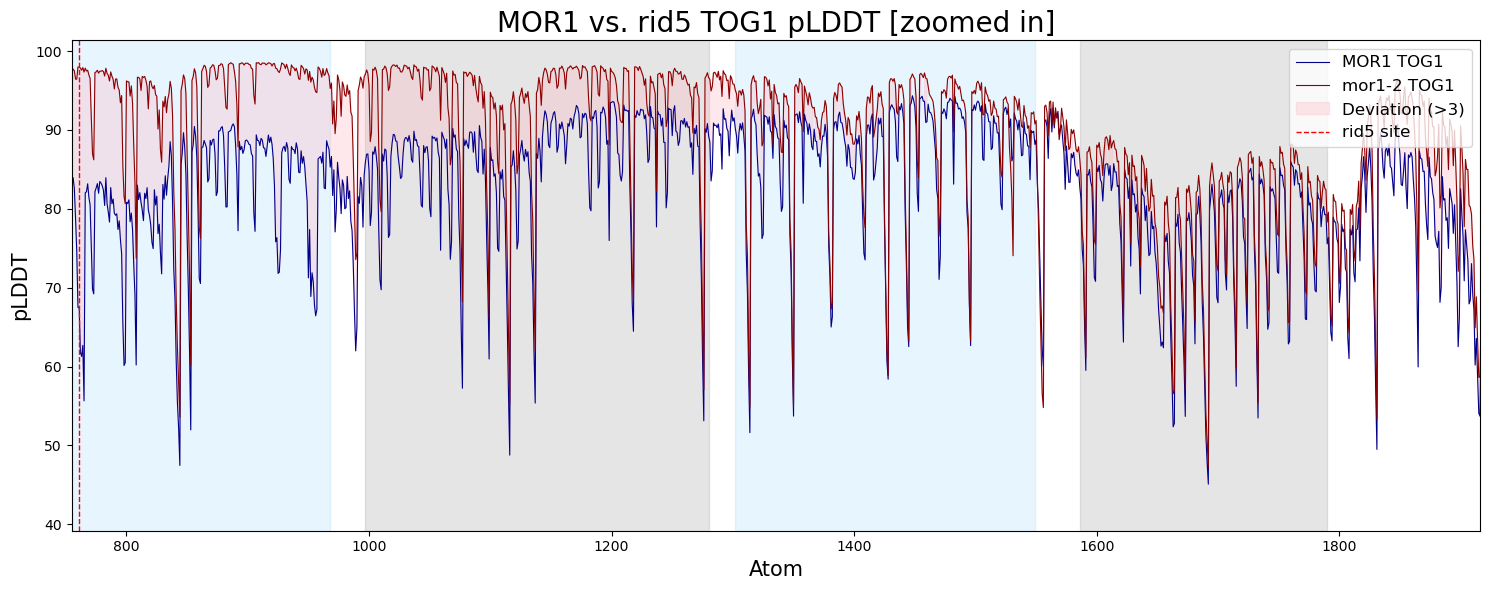

In [37]:

# Example data
data1 = np.asarray(mor12["atom_plddts"])
data2 = np.asarray(rid5["atom_plddts"])

# Trim data to the same length
min_length = min(len(data1), len(data2-6))
data1 = data1[:min_length-6]
data2 = data2[6:min_length]

plt.figure(figsize=(15, 6))  # Width: 15 inches, Height: 6 inches
# Plot the two datasets
plt.plot(data2, linewidth=0.8, color="darkblue", label="MOR1 TOG1")
plt.plot(data1, linewidth=0.8, color="darkred", label="mor1-2 TOG1")
plt.axvspan(1, 323, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(343, 669, zorder=0, alpha=0.2, color='grey')
plt.axvspan(693, 968, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(997, 1280, zorder=0, alpha=0.2, color='grey')
plt.axvspan(1302, 1549, zorder=0, alpha=0.2, color='lightskyblue')
plt.axvspan(1586, 1790, zorder=0, alpha=0.2, color='grey')
# Highlight deviations
deviation = np.abs(data1 - data2) 
plt.fill_between(
    range(len(data1)),
    data1,
    data2,
    where=(deviation > 3),  
    color="lightpink",
    alpha=0.3,
    label="Deviation (>3)"
)

left_limit, right_limit = plt.xlim()
rightEnd2 = right_limit

plt.xlim(left=755, right=rightEnd2-100)
highlight_atom = 761  # Replace with the index of the atom you want to highlight
plt.axvline(x=highlight_atom, color="red", linestyle="--", linewidth=1, label="rid5 site")


# Add labels, titles, and legend
plt.xlabel("Atom", fontsize=15)
plt.ylabel("pLDDT", fontsize=15)
plt.title(f"MOR1 vs. rid5 TOG1 pLDDT [zoomed in]", fontsize=20)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()

# Save and show the plot
plt.savefig("/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/MOR1vsrid5TeeeOG1pLDDTzoomedin.png", dpi=300)
plt.show()


Average PLDDTs: 89.76168137000519
Average pae: 4.948468153722119


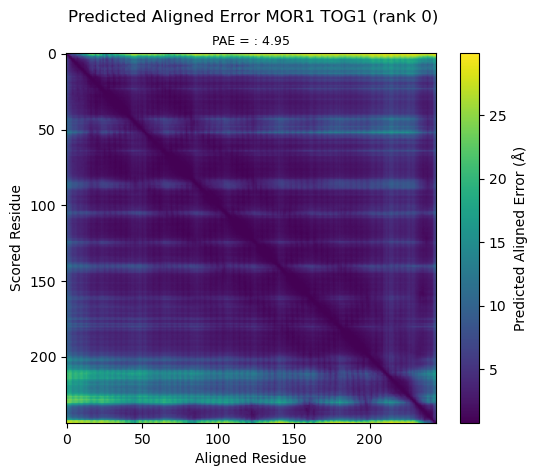

2022.3


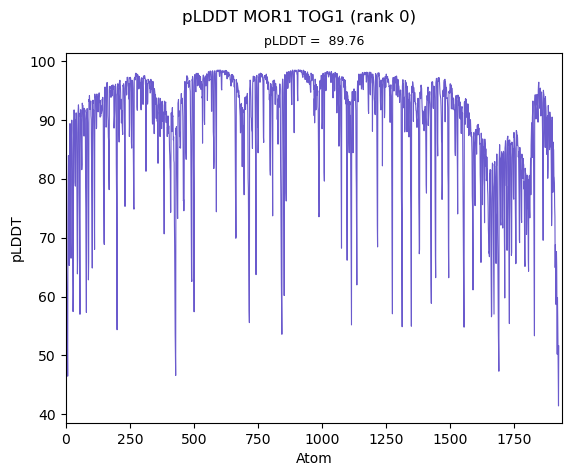

Average PLDDTs: 82.375763062597
Average pae: 7.1785474334856225


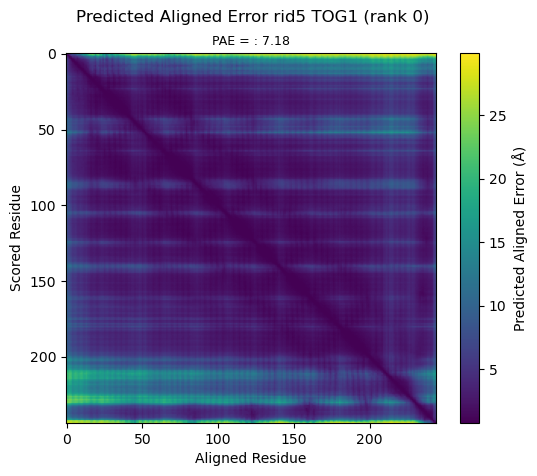

2028.6


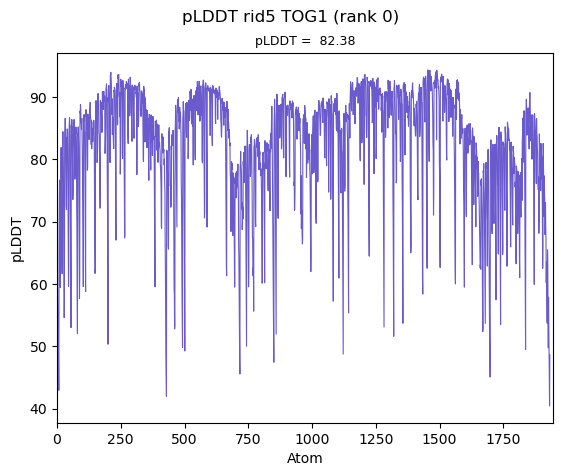

In [19]:
#rank 0 for MOR1 TOG1 6 aa rem at end
avgplddts1 = np.mean(mor12["atom_plddts"])  
avgpae1 = np.mean(mor12["pae"])  
print("Average PLDDTs:", avgplddts1)
print("Average pae:", avgpae1)

plt.imshow(np.asarray(mor12["pae"]))
plt.xlabel("Aligned Residue")
plt.ylabel("Scored Residue")
plt.title(f"PAE = : {avgpae1:.2f}", y=0.999, fontsize=9)
plt.suptitle("Predicted Aligned Error MOR1 TOG1 (rank 0)", x=0.46, y=0.97, fontsize=12)
plt.colorbar(label='Predicted Aligned Error (Å)')

desktop_path1 = "/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/mor12TOG1_PAE_graph.png" 
plt.savefig(desktop_path1, format='png', dpi=300) 
plt.show()

plt.plot(np.asarray(mor12["atom_plddts"]), linewidth=0.8, color="slateblue")
plt.xlabel("Atom")
plt.ylabel("pLDDT")
plt.title(f"pLDDT =  {avgplddts1:.2f}", y=0.999, fontsize=9)
plt.suptitle("pLDDT MOR1 TOG1 (rank 0)", x=0.49, y=0.97, fontsize=12)

left_limit, right_limit = plt.xlim()
rightEnd1 = right_limit
print(rightEnd1)
plt.xlim(left=0, right=rightEnd1-84)

desktop_path2 = "/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/mor12TOG1_pLDDTatoms.png" 
plt.savefig(desktop_path2, format='png', dpi=300) 
plt.show()




avgplddts1 = np.mean(rid5["atom_plddts"])  
avgpae1 = np.mean(rid5["pae"])  
print("Average PLDDTs:", avgplddts1)
print("Average pae:", avgpae1)

plt.imshow(np.asarray(mor12["pae"]))
plt.xlabel("Aligned Residue")
plt.ylabel("Scored Residue")
plt.title(f"PAE = : {avgpae1:.2f}", y=0.999, fontsize=9)
plt.suptitle("Predicted Aligned Error rid5 TOG1 (rank 0)", x=0.46, y=0.97, fontsize=12)
plt.colorbar(label='Predicted Aligned Error (Å)')

desktop_path1 = "/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/rid5TOG1_PAE_graph.png" 
plt.savefig(desktop_path1, format='png', dpi=300) 
plt.show()

plt.plot(np.asarray(rid5["atom_plddts"]), linewidth=0.8, color="slateblue")
plt.xlabel("Atom")
plt.ylabel("pLDDT")
plt.title(f"pLDDT =  {avgplddts1:.2f}", y=0.999, fontsize=9)
plt.suptitle("pLDDT rid5 TOG1 (rank 0)", x=0.49, y=0.97, fontsize=12)

left_limit, right_limit = plt.xlim()
rightEnd1 = right_limit
print(rightEnd1)
plt.xlim(left=0, right=rightEnd1-84)

desktop_path2 = "/Users/kamdiehl/Desktop/MOR1 Alphafold/Manuscript Figures/rid5TOG1_pLDDTatoms.png" 
plt.savefig(desktop_path2, format='png', dpi=300) 
plt.show()
